# 1. Closing price for data

In [1]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v4/data"
    # data_id：股票代號
    #start_date:資料起始日期
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2330",
    "start_date": "2023-01-01"
}
r = requests.get(url, params=parameter)
data = r.json()
tsmc2023 = pd.DataFrame(data["data"])
tsmc2023.to_csv('tsmc2023.csv')

In [3]:
import pandas as pd
df =pd.read_csv('./tsmc2023.csv')
df.head()

,Unnamed: 0,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,0,2023-01-03,2330,15311364,6871973708,446.0,453.5,443.0,453.0,4.5,22581
1,1,2023-01-04,2330,20626874,9310050329,449.5,455.0,448.5,449.5,-3.5,18233
2,2,2023-01-05,2330,23972099,10972616269,459.0,459.5,455.0,458.5,9.0,20752
3,3,2023-01-06,2330,21313593,9745142549,455.0,459.5,455.0,458.5,0.0,16635
4,4,2023-01-09,2330,49186355,23352375299,468.0,481.0,467.5,481.0,22.5,57305


Text(0.5, 1.0, 'Closing price for data')

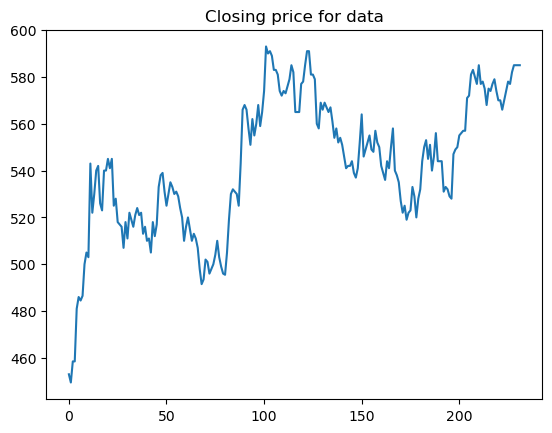

In [4]:
import matplotlib.pyplot as plt
sns.lineplot(data=amazon,x="Date",y='Close',color='firebrick')
plt.plot(df.index, df['close'])
plt.title("Closing price for data")

In [9]:
# Using plotly module to present Time Series via date
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure([go.Scatter(x=df['date'], y=df['close'])])
fig.show()

# 2. Present Volume via Bar Graph

In [10]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure()
fig.add_trace(go.Bar(x=df['date'], y=df['Trading_Volume']))
fig.show()

In [11]:
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure()
fig.add_trace(go.Bar(x=df['date'], y=df['Trading_Volume']))
fig.show()

5-day moving average

In [12]:
import pandas as pd
# importing time-series data
movingAverages = pd.read_csv('tsmc2023.csv', index_col='date', parse_dates=True)
# printing dataFrame
display(movingAverages.head())

,Unnamed: 0,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
date,,,,,,,,,,
2023-01-03,0,2330,15311364,6871973708,446.0,453.5,443.0,453.0,4.5,22581
2023-01-04,1,2330,20626874,9310050329,449.5,455.0,448.5,449.5,-3.5,18233
2023-01-05,2,2330,23972099,10972616269,459.0,459.5,455.0,458.5,9.0,20752
2023-01-06,3,2330,21313593,9745142549,455.0,459.5,455.0,458.5,0.0,16635
2023-01-09,4,2330,49186355,23352375299,468.0,481.0,467.5,481.0,22.5,57305


In [13]:
# Mathematical calculations 
import numpy as np
# updating our dataFrame to have only one column 'Close' as rest all columns are of no use for us at the moment using .to_frame() to convert pandas series into dataframe.
movingAverages = movingAverages['close'].to_frame()
# calculating simple moving average using .rolling(window).mean() , with window size = 5
movingAverages['SMA5'] = movingAverages['close'].rolling(5).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)

,close,SMA5
date,,
2023-01-09,481.0,460.1
2023-01-10,486.0,466.7
2023-01-11,484.5,473.7
2023-01-12,486.5,479.3
2023-01-13,500.0,487.6
...,...,...
2023-12-14,582.0,576.2
2023-12-15,585.0,579.2
2023-12-18,585.0,581.4


Text(0.5, 1.0, '5-day moving average')

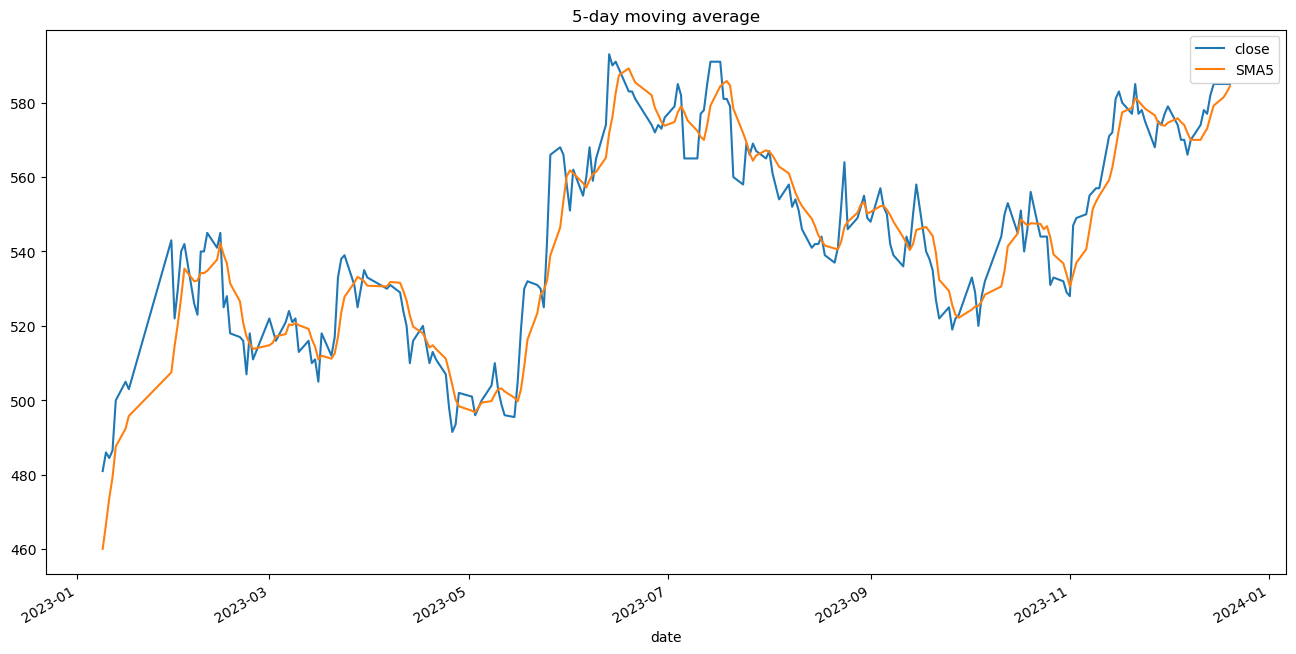

In [14]:
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['close', 'SMA5']].plot(label='RELIANCE',figsize=(16,8))
plt.title("5-day moving average")

10-day moving average

,close,SMA5,SMA10
date,,,
2023-02-01,530.0,520.6,504.10
2023-02-02,540.0,527.6,510.00
2023-02-03,542.0,535.4,515.60
2023-02-06,526.0,532.0,519.75
2023-02-07,523.0,532.2,523.40
...,...,...,...
2023-12-14,582.0,576.2,574.00
2023-12-15,585.0,579.2,574.60
2023-12-18,585.0,581.4,575.70


Text(0.5, 1.0, '10-day moving average')

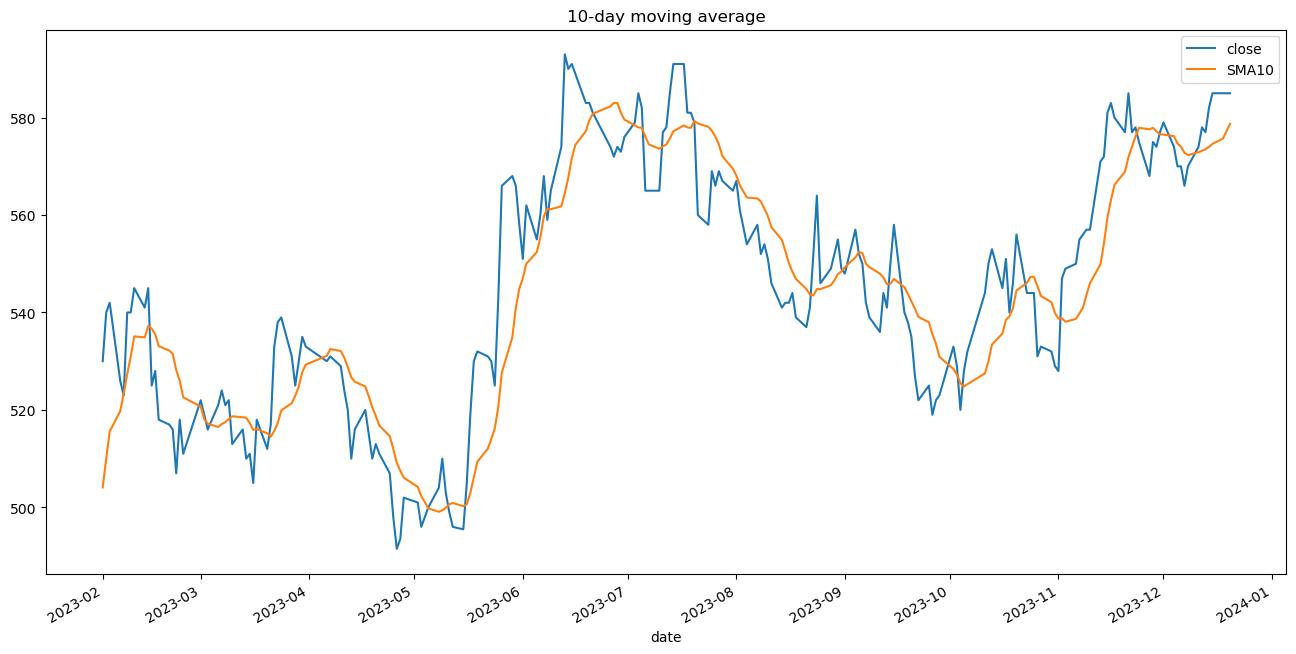

In [15]:
# calculating simple moving average using .rolling(window).mean() , with window size = 10
movingAverages['SMA10'] = movingAverages['close'].rolling(10).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['close', 'SMA10']].plot(label='RELIANCE',figsize=(16,8))
plt.title("10-day moving average")

20-day moving average

,close,SMA5,SMA10,SMA20
date,,,,
2023-03-02,519.0,515.4,518.1,527.65
2023-03-03,516.0,517.2,517.2,526.95
2023-03-06,521.0,517.8,516.5,526.00
2023-03-07,524.0,520.4,517.1,525.10
2023-03-08,521.0,520.2,517.5,524.85
...,...,...,...,...
2023-12-14,582.0,576.2,574.0,575.30
2023-12-15,585.0,579.2,574.6,575.55
2023-12-18,585.0,581.4,575.7,575.95


Text(0.5, 1.0, '20-day moving average')

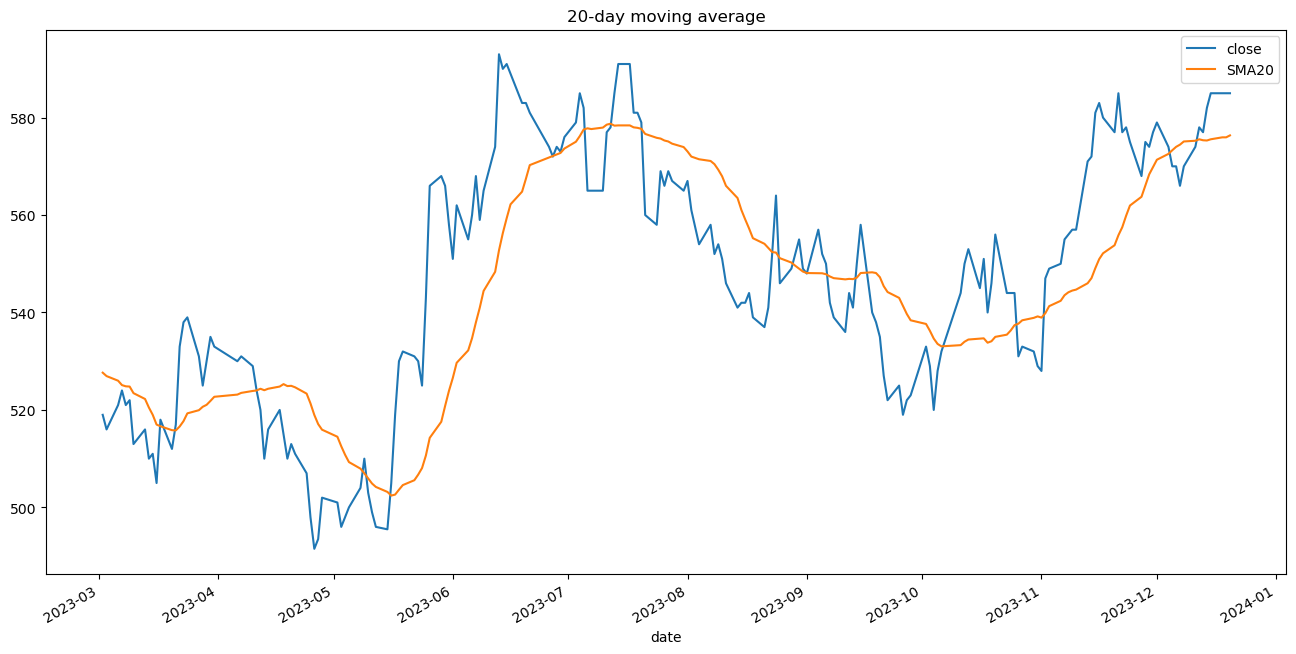

In [16]:
# calculating simple moving average using .rolling(window).mean() , with window size = 20
movingAverages['SMA20'] = movingAverages['close'].rolling(20).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['close', 'SMA20']].plot(label='RELIANCE',figsize=(16,8))
plt.title("20-day moving average")

60-day moving average

,close,SMA5,SMA10,SMA20,SMA60
date,,,,,
2023-05-30,566.0,553.6,541.0,520.825,518.791667
2023-05-31,558.0,560.2,544.9,523.925,519.441667
2023-06-01,551.0,561.8,547.0,526.575,520.025000
2023-06-02,562.0,561.0,550.0,529.675,520.708333
2023-06-05,555.0,558.4,552.4,532.225,521.225000
...,...,...,...,...,...
2023-12-14,582.0,576.2,574.0,575.300,553.450000
2023-12-15,585.0,579.2,574.6,575.550,554.233333
2023-12-18,585.0,581.4,575.7,575.950,555.066667


Text(0.5, 1.0, '60-day moving average')

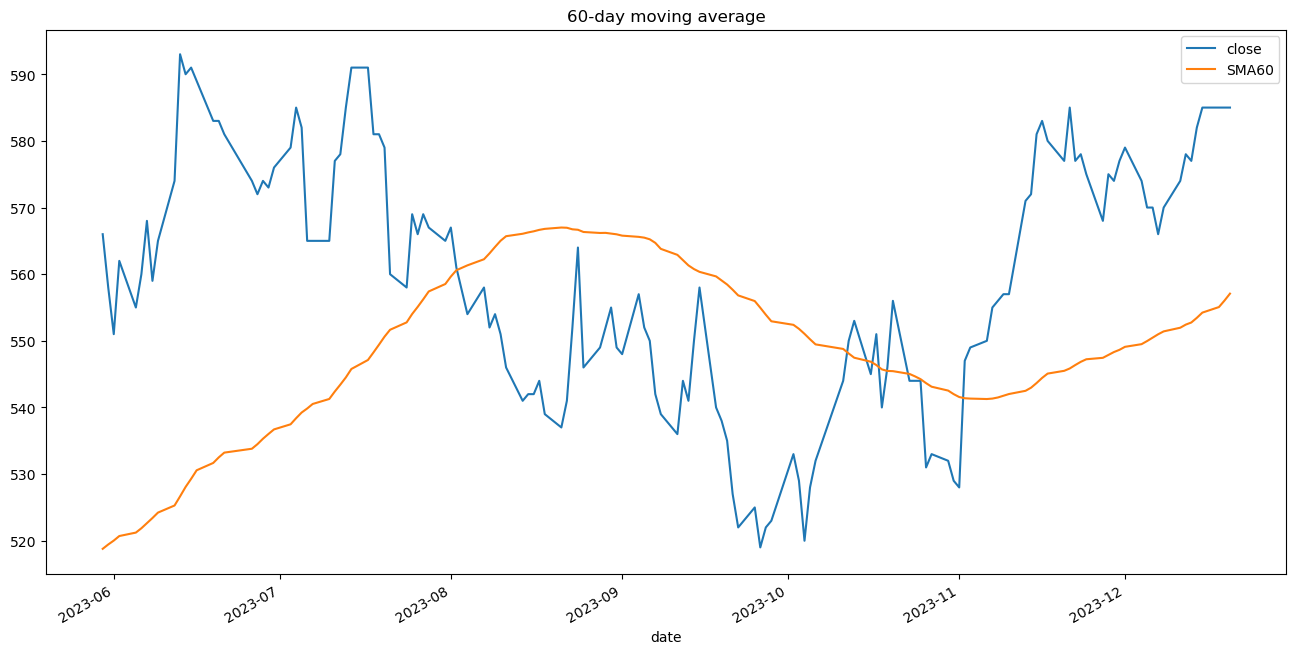

In [17]:
# calculating simple moving average using .rolling(window).mean() , with window size = 60
movingAverages['SMA60'] = movingAverages['close'].rolling(60).mean()
# removing all the NULL values using dropna() method
movingAverages.dropna(inplace=True)
# printing Dataframe
display(movingAverages)
# plotting graphs
import matplotlib.pyplot as plt
movingAverages[['close', 'SMA60']].plot(label='RELIANCE',figsize=(16,8))
plt.title("60-day moving average")

# 4. Candlestick Chart 

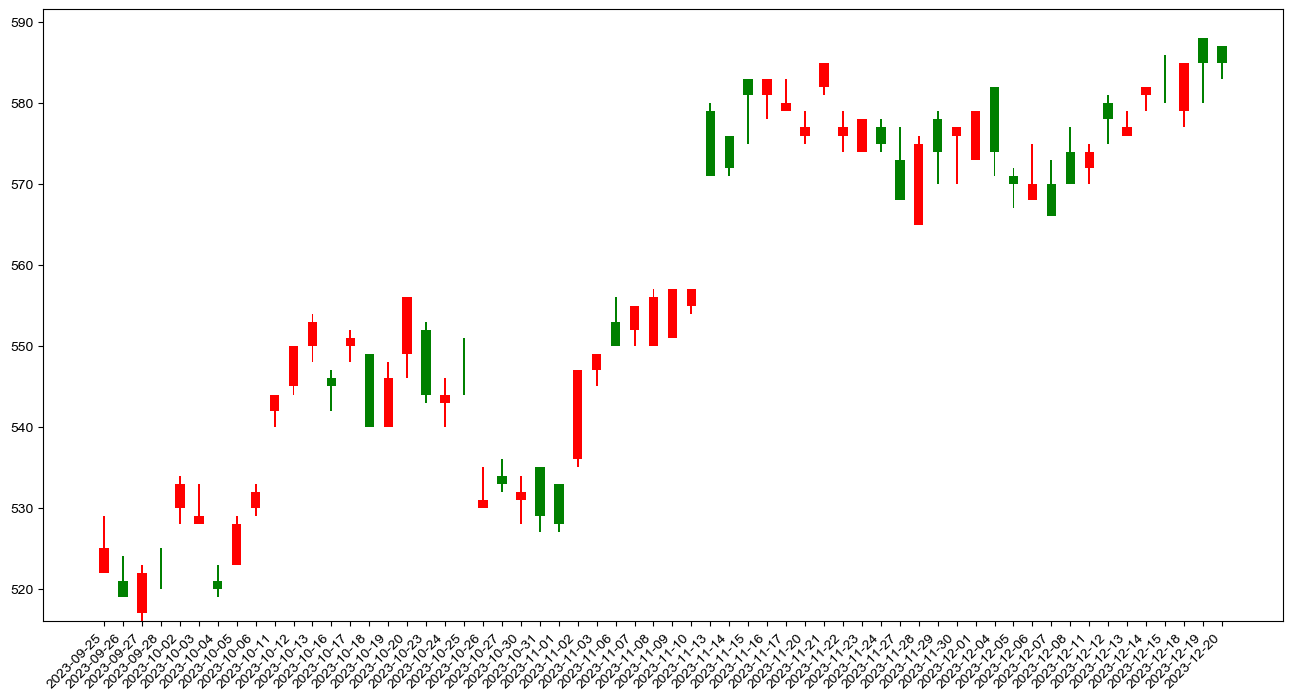

In [19]:
# Using matplotlib to show Candlestick Chart
import matplotlib.pyplot as plt
# plt.rc("font", family="Microsoft JhengHei")  # 微軟正黑體
plt.rcParams['font.family']=['Arial Unicode MS']  # mac
import csv
import pandas as pd
reader = pd.read_csv("tsmc2023.csv",encoding="utf-8")
reader_last_10dataframe = reader.tail(60)
info = reader_last_10dataframe.values
fig = plt.figure(figsize=(16, 9))
for row in info:
    # print(row)
    date=row[1]
    open_price=float(row[5])
    close_price=float(row[8])
    hightest=float(row[6])
    lowest=float(row[7])
    # 決定 陰線(下跌)  或 陽線(上漲)
    color="green"
    if close_price > open_price:
        color="red"
    # 畫陰陽線
    plt.bar(
        date,
        abs(open_price - close_price),
        bottom=min(open_price, close_price),
        color=color, width=0.5
    )
    # 畫影線 
    plt.bar(date, hightest - lowest, bottom=lowest,color=color, width=0.1)
fig.autofmt_xdate(rotation=45)
plt.show()

In [20]:
# Using finplot to show Candlestick Chart
import finplot as fplt
import pandas as pd
reader = pd.read_csv("tsmc2023.csv",encoding="utf-8")
reader_last_60dataframe = reader.tail(60)
fplt.candlestick_ochl(reader_last_60dataframe[['open', 'close', 'max', 'min']])
fplt.show()

 - Assuming time column is missing and using index instead.


QPainter::drawPicture: Painter not active


In [21]:
# Using plotly to show Candlestick Chart
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime
df = pd.read_csv("./tsmc2023.csv")
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['max'],
                low=df['min'],
                close=df['close'])])

fig.show()

# 5.Present Candlestick Chart and Volume

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.express as px
import pandas as pd
from datetime import datetime
df = pd.read_csv("./tsmc2023.csv")
fig = make_subplots(rows = 2, cols = 1, subplot_titles=("Candlestick Chart","Volume"))
fig.add_trace(go.Candlestick(
                x=df['date'],
                open=df['open'],
                high=df['max'],
                low=df['min'],
                close=df['close'], name="CandlestickChart"), row=1, col=1)

fig.add_trace(go.Bar(x=df['date'], y=df['Trading_Volume'], name="Volume"), row=2, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text="TSMC")
fig.show()

# 6. Machine Learning Model usign Linear Regression to predict Next Day Value

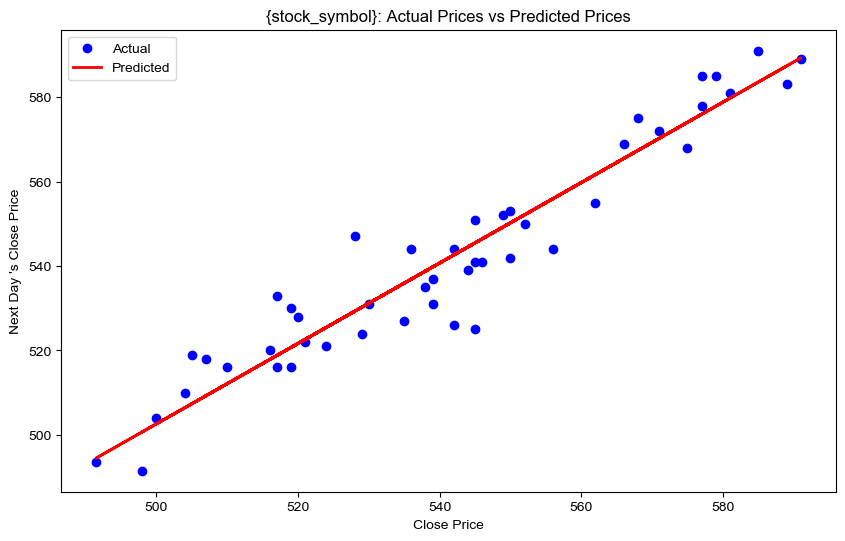

In [47]:
# import necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

data = pd.read_csv("./tsmc2023.csv")

# Extract the closing price
data = data[['close']]

# Create a new column for the next day's price (shifted -1 day)
data['Next close'] = data['close'].shift(-1)

# Drop the Last row (NaN) becasue there's no next day's data
data = data.dropna()

# Create features (X) and target (Y)
x = data[['close']].values
y = data[['Next close']].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=250)

# Create a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Fit the model on the test data
y_pred = model.predict(x_test)

# Visualize the actual price and predicted price
plt.figure(figsize=(10,6))

# Adjust transparency and color
plt.scatter(x_test,y_test,color='blue',label='Actual')
plt.plot(x_test,y_pred,color='red',linewidth=2, label='Predicted')

# Adjust transparency and color
plt.title("{stock_symbol}: Actual Prices vs Predicted Prices")
plt.xlabel("Close Price")
plt.ylabel("Next Day \'s Close Price")
plt.legend()
plt.show()

# 7. Stock Market Prediction using RNN-LSTM model

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = pd.read_csv("./tsmc2022.csv", index_col="date", parse_dates=True)
dfprice = pd.DataFrame(df['close'])
sequence_length = 10
scaler = MinMaxScaler()
dfprice = scaler.fit_transform(dfprice)
data = []
for i in range(len(dfprice) - sequence_length):
    data.append(dfprice[i: i + sequence_length + 1])
reshaped_data = np.array(data)
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
split_boundary = int(reshaped_data.shape[0] * 0.8) 
train_x = x[: split_boundary]
test_x = x[split_boundary:]
train_y = y[: split_boundary]
test_y = y[split_boundary:]
# 建立模型
model = Sequential()
model.add(LSTM(input_shape=(10,1), units=256, unroll=False))
model.add(Dense(units=1))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=100, 
          epochs=100, validation_split=0.2, verbose=2)
model.save('stock_model.h5')

2023-12-21 00:17:11.446488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2/2 - 3s - loss: 0.2920 - accuracy: 0.0000e+00 - val_loss: 0.0134 - val_accuracy: 0.0263 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.0766 - accuracy: 0.0000e+00 - val_loss: 0.0118 - val_accuracy: 0.0263 - 152ms/epoch - 76ms/step
Epoch 3/100
2/2 - 0s - loss: 0.0148 - accuracy: 0.0067 - val_loss: 0.0475 - val_accuracy: 0.0263 - 206ms/epoch - 103ms/step
Epoch 4/100
2/2 - 0s - loss: 0.0528 - accuracy: 0.0067 - val_loss: 0.0224 - val_accuracy: 0.0263 - 166ms/epoch - 83ms/step
Epoch 5/100
2/2 - 0s - loss: 0.0120 - accuracy: 0.0067 - val_loss: 0.0062 - val_accuracy: 0.0263 - 176ms/epoch - 88ms/step
Epoch 6/100
2/2 - 0s - loss: 0.0056 - accuracy: 0.0067 - val_loss: 0.0032 - val_accuracy: 0.0263 - 135ms/epoch - 68ms/step
Epoch 7/100
2/2 - 0s - loss: 0.0159 - accuracy: 0.0067 - val_loss: 0.0032 - val_accuracy: 0.0263 - 223ms/epoch - 112ms/step
Epoch 8/100
2/2 - 0s - loss: 0.0204 - accuracy: 0.0067 - val_loss: 0.0032 - val_accuracy: 0.0263 - 210ms/epoch - 105ms/step
Epoch 9/10

2/2 [==============================] - 1s 7ms/step


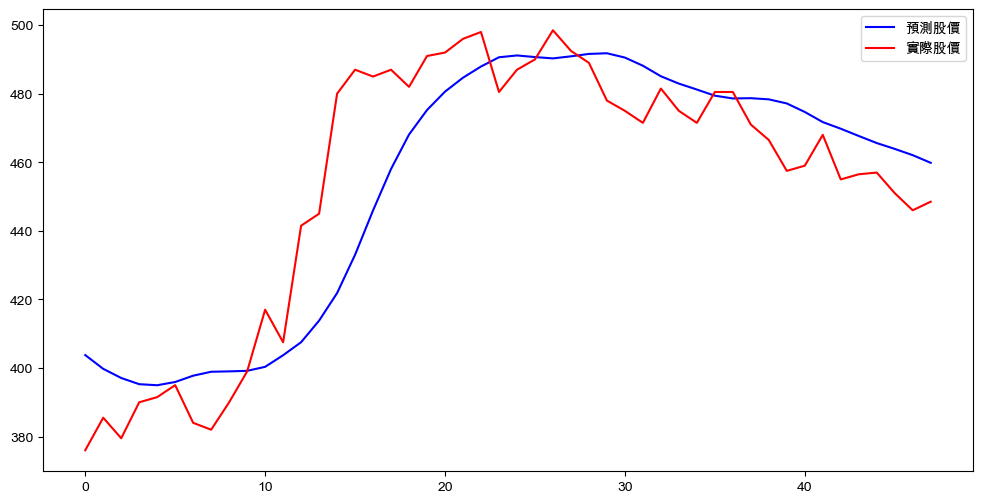

In [50]:
# 預測收盤股價
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

df = pd.read_csv('tsmc2022.csv', encoding='utf-8')
dfprice = pd.DataFrame(df['close'])
sequence_length = 10
scaler = MinMaxScaler()
dfprice = scaler.fit_transform(dfprice)
data = []
for i in range(len(dfprice) - sequence_length):
    data.append(dfprice[i: i + sequence_length + 1])
reshaped_data = np.array(data)
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
split_boundary = int(reshaped_data.shape[0] * 0.8) 
train_x = x[: split_boundary]
test_x = x[split_boundary:]
train_y = y[: split_boundary]
test_y = y[split_boundary:]

model = load_model('stock_model.h5')
predict = model.predict(test_x)
predict = scaler.inverse_transform(predict)
test_y = scaler.inverse_transform(test_y)
plt.rcParams['font.family']=['Arial Unicode MS'] ## mac
# plt.rc("font", family="Microsoft JhengHei")  # 微軟正黑體
# 繪出股價圖表
plt.figure(figsize=(12,6))
plt.plot(predict, 'b-')
plt.plot(test_y, 'r-')
plt.legend(['預測股價', '實際股價'])
plt.show()